# Building a Sentiment Analysis of Tweets 
## * Tweepy
## * TextBlob
## * WordCloud
## * NLTK

## Goal:
To analyze a prominent global leader's tweets': 1) Themes; 2) Sentiments (polarity and subjectivity)' and 3)  

To map out his relation to his Followers through a Neural Network.

We could  use Word2Vec on out Twitter dataset to determine which phrases appear the most frequently in tweets to compare with whether they have been retweeted or flagged.

## Resources 
### Use to perform authentication: 
    auth = tweepy.0AuthHandler(consumer_key, consumer_secret)
Twitter Sentiment Analysis: https://www.youtube.com/watch?v=o_OZdbCzHUA

In [32]:
!pip install tweepy

In [33]:
!pip install textblob

In [34]:
!pip install preprocessor

# Project 1: Javad Zarif
@JZarif
Foreign Minister of Islamic Republic of Iran
https://www.youtube.com/watch?v=ujId4ipkBio&t=361s

In [35]:
import tweepy 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [36]:
# from secrets import consumer_key,consumer_secret
#Need the API
    #consumer_key = ""
    #consumer_secret = ""

consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE' 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

## Load Data set

In [37]:
import pandas as pd

In [38]:
#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 200, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) Fruitful continuation of visit to Iraqi Kurdistan

Met with KDP President @masoud_barzani, Iraqi Kurdistan Region Pres. @IKRPresident and Region PM @masrour_barzani. 

Strong relations with all Iraqis remain a cornerstone of Iran's policy.

Our neighbors are our priority. https://t.co/amGOArxAaz

2) Productive talks in Baghdad with PM @MAKadhimi, Pres. @BarhamSalih, Speaker Halbousi, FM @Fuad_Hussein1 and judicial, political and military leaders.

Agenda: Expanding cooperation to benefit our peoples—and the region.

Next stop: Erbil for meetings with Kurdish leadership. https://t.co/bB6l3KQnKP

3) Today is 5th anniv. of the #JCPOA—last decade’s greatest diplomatic achievement—and reminder that US lawless behavior should not be the yardstick by which int'l norms are measured.

US contempt for law &amp; diplomacy places it in global disrepute &amp; threatens global—and US—security. https://t.co/m2KoTHwhj4

4) 25 yrs ago today, #SrebrenicaGenocide bega

In [39]:
#Create a dataframe with a column and label column as 'Tweets'
import pandas as pd
df = pd.DataFrame([tweet.full_text for tweet in zarif_tweets], columns = ['Tweets'])
df.head(10)

,Tweets
0,Fruitful continuation of visit to Iraqi Kurdis...
1,Productive talks in Baghdad with PM @MAKadhimi...
2,Today is 5th anniv. of the #JCPOA—last decade’...
3,"25 yrs ago today, #SrebrenicaGenocide began as..."
4,My virtual dialog earlier today with Rome 2020...
5,Don't believe the hype: Iran triggered #JCPOA ...
6,Just concluded very constructive (virtual) sum...
7,Full video of my statement before the UN Secur...
8,The int'l community in general—and UN Security...
9,The US isn't merely violating JCPOA and bullyi...


## Clean text

In [40]:
#Create a function to clean tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(clean_text)
df

,Tweets
0,Fruitful continuation of visit to Iraqi Kurdis...
1,Productive talks in Baghdad with PM @MAKadhimi...
2,Today is 5th anniv. of the JCPOA—last decade’s...
3,"25 yrs ago today, SrebrenicaGenocide began as ..."
4,My virtual dialog earlier today with Rome 2020...
...,...
195,As the world—minus 3 or 2 panicked cohorts—was...
196,"Did you know, @realdonaldtrump, that Netanyahu..."
197,
198,The possessor of REAL nukes cries wolf—on an A...


In [41]:
#Create a function to get 'subjectivity' and 'polarity'

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['polarity'] = df['Tweets'].apply(get_polarity)

#Show the new dataframe
df

,Tweets,subjectivity,polarity
0,Fruitful continuation of visit to Iraqi Kurdis...,0.733333,0.433333
1,Productive talks in Baghdad with PM @MAKadhimi...,0.066667,-0.033333
2,Today is 5th anniv. of the JCPOA—last decade’s...,0.500000,0.500000
3,"25 yrs ago today, SrebrenicaGenocide began as ...",0.135714,-0.102381
4,My virtual dialog earlier today with Rome 2020...,0.333333,0.100000
...,...,...,...
195,As the world—minus 3 or 2 panicked cohorts—was...,0.250000,0.000000
196,"Did you know, @realdonaldtrump, that Netanyahu...",0.063889,0.000000
197,,0.000000,0.000000
198,The possessor of REAL nukes cries wolf—on an A...,0.411364,0.206818


### Observation: 
We can now see the three columns for analysis, like wordcloud to visualize.

## Analysis: Word Cloud

<function matplotlib.pyplot.show(*args, **kw)>

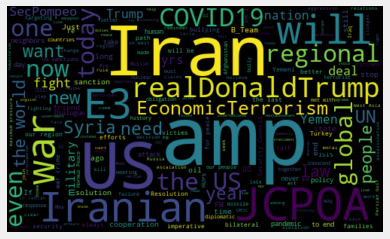

In [42]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['Tweets']])
WordCloud = WordCloud(width = 500, height= 300, random_state = 21, 
                      max_font_size =110).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

### Observation:
* We see that Iran and US are most noticeable.
* We see that JCPOA, which stands for joint agreement between Iran, US, Iran, Germany, and UK promoting nuclear nonproliferation goals achieved during Obama-Biden administration.



In [43]:
#Create a function to denote the positive, negative, and neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

#Show df
df

,Tweets,subjectivity,polarity,Analysis
0,Fruitful continuation of visit to Iraqi Kurdis...,0.733333,0.433333,Positive
1,Productive talks in Baghdad with PM @MAKadhimi...,0.066667,-0.033333,Negative
2,Today is 5th anniv. of the JCPOA—last decade’s...,0.500000,0.500000,Positive
3,"25 yrs ago today, SrebrenicaGenocide began as ...",0.135714,-0.102381,Negative
4,My virtual dialog earlier today with Rome 2020...,0.333333,0.100000,Positive
...,...,...,...,...
195,As the world—minus 3 or 2 panicked cohorts—was...,0.250000,0.000000,Neutral
196,"Did you know, @realdonaldtrump, that Netanyahu...",0.063889,0.000000,Neutral
197,,0.000000,0.000000,Neutral
198,The possessor of REAL nukes cries wolf—on an A...,0.411364,0.206818,Positive


In [44]:
#Print all the positive tweets
j =1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Positive'):
        print(str(j) + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1
      

1Fruitful continuation of visit to Iraqi Kurdistan

Met with KDP President @masoud_barzani, Iraqi Kurdistan Region Pres. @IKRPresident and Region PM @masrour_barzani. 

Strong relations with all Iraqis remain a cornerstone of Iran's policy.

Our neighbors are our priority. 

2Today is 5th anniv. of the JCPOA—last decade’s greatest diplomatic achievement—and reminder that US lawless behavior should not be the yardstick by which int'l norms are measured.

US contempt for law &amp; diplomacy places it in global disrepute &amp; threatens global—and US—security. 

3My virtual dialog earlier today with Rome 2020 MED (Mediterranean Dialogue) at the ISPI Center; available to watch here, ICYMI:


4Just concluded very constructive (virtual) summit of the Astana Process, hosted by Pres. @HassanRouhani. 

Parties agreed to continue coordination among the three guarantors, focusing on tension reduction, political process &amp; humanitarian relief.

Peace in Syria will be achieved. 

5Full video of 

### Observation:
94 out of the 200 tweets are positive.

In [45]:
#Let's see Negative Tweets in new df
j = 1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1)Productive talks in Baghdad with PM @MAKadhimi, Pres. @BarhamSalih, Speaker Halbousi, FM @Fuad_Hussein1 and judicial, political and military leaders.

Agenda: Expanding cooperation to benefit our peoples—and the region.

Next stop: Erbil for meetings with Kurdish leadership. 

2)25 yrs ago today, SrebrenicaGenocide began as Europe failed to uphold its basic duties. Quarter of a century later Europe is plagued by same ineptitude.

The failure of the @UN to take any action at the time—to forever haunt the world body—should remain a lesson for the present. 

3)Don't believe the hype: Iran triggered JCPOA DRM on at least 6 occasions (in ref to U.S. AND E3 violations)

16 Dec 2016 (U.S.)
10 May 2018 (U.S.)
17 June 2018 (U.S.)
6 Nov 2018 (U.S. &amp; E3)
8 May 2019 (U.S. &amp; E3)
2 July 2020 (E3)

I will be publishing all my letters shortly. 

4)The US isn't merely violating JCPOA and bullying others to do so, too. It also has dishonor of being first in UN history to punish law-abiding cou

### Observation:
57 out of the 200 tweets are negative. In contrast, there are almost double the number of positive tweets by Foreign Minister Javed Zarif.
* Interesting: Mentioning Uniting for Palestinians is considered 'negative'.
* Arguing for "Stop War" as a theme came up as negative.

## Visualize Tweets by Foreign Minister Javed Zarif.

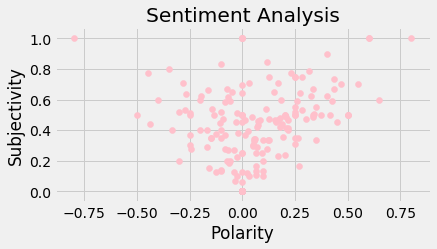

In [46]:
#Plot the polarity and subjectivity
plt.figure(figsize=(6,3)) 
for i in range(0, sorted_DF.shape[0]): 
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Pink') 

plt.title ('Sentiment Analysis' ) 
plt.xlabel ('Polarity') 
plt.ylabel ('Subjectivity')     
plt.show()
    

### Observation:
We see that Javed's tweets mostly skew positive. 

In [47]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ptweets)

0      Fruitful continuation of visit to Iraqi Kurdis...
2      Today is 5th anniv. of the JCPOA—last decade’s...
4      My virtual dialog earlier today with Rome 2020...
6      Just concluded very constructive (virtual) sum...
7      Full video of my statement before the UN Secur...
                             ...                        
180    Since the Saudi regime has blamed Iran—baseles...
182    "Coalition for Peaceful Resolution"?\n\nIran's...
188    "Act of war"or AGITATION for WAR?\n\nRemnants ...
194    FIGHTING TO THE LAST US SOLDIER \n\nSame B_Tea...
198    The possessor of REAL nukes cries wolf—on an A...
Name: Tweets, Length: 94, dtype: object


In [48]:
round ((ptweets.shape[0] / df.shape[0])*100,1)

47.0

In [49]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ntweets)

1      Productive talks in Baghdad with PM @MAKadhimi...
3      25 yrs ago today, SrebrenicaGenocide began as ...
5      Don't believe the hype: Iran triggered JCPOA D...
9      The US isn't merely violating JCPOA and bullyi...
11     .@SecPompeo is so desperate to mislead the wor...
12     E3 must stop public face-saving &amp; muster t...
14     Iran &amp; Russia are "determined to deal with...
16     Productive talks with my friend @MevlutCavusog...
17     International Criminal COURT now blackmailed b...
19     US has tried to heighten tension w/ Iran &amp;...
20     We achieved humanitarian swap *despite* your s...
24     Some don't think BlackLivesMatter.\n\nTo those...
29     Disgusting that those whose civilization found...
33     Today is "Honoring Philanthropists' Day" in ou...
38     2 yrs ago, @SecPompeo and his boss declared "C...
41     US has been bullying all against UNSC Resoluti...
44     Iran will be EXPORTING ventilators in a few mo...
53     Don’t be mislead by usua

In [50]:
round ((ntweets.shape[0] / df.shape[0])*100,1)

28.5

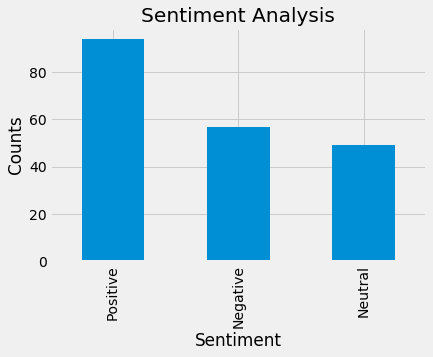

In [51]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and show
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Observation:
As mentioned earlier, this Twitter account's sample of 200 tweets reflects mostly positive tweets. Approximimately 75 percent of the tweets are , thus 25 percent are neutral. 
Let's look at 200 of his followers below:

In [52]:
#Create a list of followers
followers = []

In [53]:
cursor = tweepy.Cursor(api.followers, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers.append(account.screen_name)

In [54]:
print("Followers:", ''.join(sorted(followers, key=lambda s:s.lower())))

Followers: 1DX9uOa3ZZHoKZW7AbuHurraalhilo_tahahassanh55677698KarrarGbrKf9cBguUey4zCGPMatheus02913058mohdkumail110Saleh34222880Turky36117890


In [55]:
#Get Followers' ID Method
followers_ids = []

In [56]:
cursor = tweepy.Cursor(api.followers_ids, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers_ids.append(account.screen_name)

AttributeError: 'int' object has no attribute 'screen_name'

In [ ]:
#Determine who Javed Zarif follows: 'friends'
friends = []
cursor = tweepy.Cursor(api.friends, screen_name = 'JZarif')
for friend in cursor.items(10):
    friends.append(friend.screen_name)

In [ ]:
print('Friends:', ''.join(sorted(friends, key =  lambda s: s.lower())))

In [ ]:
#Create two new columns capturing 'followers' and 'friends' and readd to df

#df['friends'] = df['Tweets'].apply(friends)
df['followers'] = df['Tweets'].apply(followers)

    #attempt 2
#df['friends'] = df.append(df['friends'])

        #attempt 3
#df2 = df.insert(df[4,'friends',[for friend in cursor.items()],True])

#Show the new dataframe
df2

### Trending Topics

In [ ]:
#Trending Topics
trends_available = api.trends_available()
len(trends_available)

In [ ]:
trends_available[0]

In [ ]:
trends_available[1]

In [ ]:
#Trending Places
world_trends = api.trends_place(id=1)

In [ ]:
trends_list =world_trends[0]['trends']

In [ ]:
#July 19th's Trend topic list
trends_list[0]

In [ ]:
#Volume of 10,000 tweets
trends_list = [t for t in trends_list if t['tweet_volume']]

In [ ]:
from operator import itemgetter
trends_list.sort(key = itemgetter('tweet_volume'),reverse= True)

In [ ]:
for trend in trends_list[:5]:
    print(trend['name'])

In [ ]:
#Let's get top trending topics in Washington, DC on July 19th
dc_trends = api.trends_place(id= 2514815) #WOEID = Washington, District of Columbia, 2514815
dc_list = dc_trends[0]['trends']
dc_list = [t for t in dc_list if t['tweet_volume']]
dc_list.sort(key =itemgetter('tweet_volume'), reverse = True)
for trend in dc_list[:10]:
    print(trend['name'])

### Observation:
We see that the top 10 trending topics in DC are America, Congressman John Lewis, Reporter Chris Wallace, #BBNaija, Democrate, Kanye, De Gea, Bill Nye, Nicki Minaj, and #removeitforzan. 

## Analysis:  Conducting TFIDF

In [61]:
X_train = df
X = df
df

,Tweets,subjectivity,polarity,Analysis
0,Fruitful continuation of visit to Iraqi Kurdis...,0.733333,0.433333,Positive
1,Productive talks in Baghdad with PM @MAKadhimi...,0.066667,-0.033333,Negative
2,Today is 5th anniv. of the JCPOA—last decade’s...,0.500000,0.500000,Positive
3,"25 yrs ago today, SrebrenicaGenocide began as ...",0.135714,-0.102381,Negative
4,My virtual dialog earlier today with Rome 2020...,0.333333,0.100000,Positive
...,...,...,...,...
195,As the world—minus 3 or 2 panicked cohorts—was...,0.250000,0.000000,Neutral
196,"Did you know, @realdonaldtrump, that Netanyahu...",0.063889,0.000000,Neutral
197,,0.000000,0.000000,Neutral
198,The possessor of REAL nukes cries wolf—on an A...,0.411364,0.206818,Positive


In [59]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split

vect = CountVectorizer()
vect.fit(X)

CountVectorizer()

In [60]:
vectorizer = TfidfVectorizer(max_df=1, # drop words that occur in more than 60% the tweets
                             min_df=1, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since shouting uses CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
zarif_tweets_tfidf = vectorizer.fit_transform(df)
print("Number of features: %d" % zarif_tweets_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(zarif_tweets_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tweets_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tweets_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
print(terms)


Number of features: 4
['analysis', 'polarity', 'subjectivity', 'tweets']


In [ ]:
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tweets_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tweets_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X[])
print('Tf_idf vector:', tfidf_bypara[])

In [ ]:
sorted_DF

In [18]:
# We are going to create a document-term matrix of where the negative tweets are by 
    #using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(sorted_DF.Analysis) #replace transcript
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = sorted_DF.index
data_dtm

,negative,neutral,positive
114,1,0,0
191,1,0,0
190,1,0,0
108,1,0,0
33,1,0,0
...,...,...,...
87,0,0,1
105,0,0,1
100,0,0,1
138,0,0,1


In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(clean_text.df)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = clean_text.index
data_dtm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect = TfidfVectorizer()
trans = tfvect.fit_transform(df['Tweets'])
pd.Dataframe(trans.toarray(), columns=tfvect).get_feature_names()

## Analysis: Analyzing Content

In [ ]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        zarif_tweets_content_df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
        zarif_tweets_content_df['id'] = np.array([tweet.id for tweet in tweets])
        zarif_tweets_content_df['len'] = np.array([len(tweet.text) for tweet in tweets])
        zarif_tweets_content_df['date'] = np.array([tweet.created_at for tweet in tweets])
        zarif_tweets_content_df['source'] = np.array([tweet.source for tweet in tweets])
        zarif_tweets_content_df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        zarif_tweets_content_df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return zarif_tweets_content_df
    print(zarif_tweets_content_df)

## Class Sentiment Listener: 
Listening for "America" topic

In [ ]:
!pip install keys

In [ ]:
!pip install sentimentlistener

In [ ]:
#Search for specific topic "America" in Javed Zarif handle
#In addition to TextBlob and tweepy: 
# sentimentlistern.py
import keys
import preprocessor as p
import sys


## Project 2B: Donald Tr ump Tweets Review
Additional Source: FiveThirtyEight https://fivethirtyeight.com/features/the-worlds-favorite-donald-trump-tweets/

In [ ]:
consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE'
access_token = ''
access_token_secret = ''

#Create the authentication object
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token = (access_token, access_token_secret)

#Create the API object
api = tweepy.API(auth)
public_tweets = api.search('Donald Trump')
for tweet in public_tweets:
    print(tweet.text2)
    analysis = TextBlob(tweet.text2)
    print(analysis.sentiment)

In [ ]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")